# Fine-Tuned DistilGPT-2 for Dialogue Summarization

## Model

The fine-tuned DistilGPT-2 model is available on Hugging Face
[distilgpt2-dialogsum-finetuned](https://huggingface.co/quylecoolkid/distilgpt2-dialogsum-finetuned)

## Error fixes

When I ran the notebook, I faced these problems and here is how I fixed it:

### Issue 1. Incompatible ```scipy``` Version

Solution: Installed the following dependencies to resolve compatibility issues:
```bash
!pip install h5py
!pip install typing-extensions
!pip install wheel
```
### Issue 2: Incompatible Target Modules in Task 8 (Preparing the Model for QLoRA)
Solution: Adjusted the target modules to match the architecture of DistilGPT-2. The original code was configured for the Microsoft Phi-2 model. Here’s the corrected configuration:

```python
from peft import LoraConfig, get_peft_model, prepare_model_for_kbit_training

config = LoraConfig(
    r=32,
    lora_alpha=32,
    target_modules=[ These were modified
        'transformer.h.4.attn.c_attn',  
        'transformer.h.4.attn.c_proj',
        'transformer.h.4.mlp.c_fc',
        'transformer.h.4.mlp.c_proj'
    ],
    bias="none",
    lora_dropout=0.05,
    task_type="CAUSAL_LM",
)
```

## Evaluation

### 1. Qualitivative Evaluation

#### Input Prompt:

The input prompt provides a detailed dialogue where Person1 suspects Person2 has chicken pox and warns about its hazards, while Person2 downplays the concern and suggests it might be a rash or allergy.

#### Baseline Human Summary:

The baseline human summary captures the essence of the conversation well:

Person1 thinks Person2 has chicken pox and warns Person2 about the possible hazards.

Person2 thinks it will be fine.

#### PEFT Model Output:

Person1 tells Person2 to take a bath

**Analysis**

Accuracy: The PEFT model output is not accurate. It omits key details about the suspicion of chicken pox and the warnings about its hazards.

Conciseness: While concise, it fails to convey the critical elements of the conversation.

Relevance: The model's output is not relevant to the main point of the dialogue, which revolves around the suspicion of chicken pox and the associated risks.

Completeness: The output is incomplete. It only mentions the action of taking a bath, which is a minor part of the conversation.

**Conclusion:**

The PEFT model's summary lacks the detail and relevance needed to accurately capture the conversation's main points. Improving the model's summarization ability could involve more training on dialogues and paying closer attention to the context and main themes in the conversation. For now, the baseline human summary provides a more accurate and comprehensive representation of the dialogue.

### 2. ROUGE metrics

| Metric       | Original Model | PEFT Model | Improvement (%) |
|--------------|----------------|------------|------------------|
| ROUGE-1      | 0.0377         | 0.0947     | +151%           |
| ROUGE-2      | 0.0000         | 0.0223     | N/A             |
| ROUGE-L      | 0.0383         | 0.0913     | +138%           |
| ROUGE-Lsum   | 0.0275         | 0.0822     | +199%           |


In summary, the PEFT model shows significant improvements across all ROUGE metrics compared to the original model, indicating better performance in generating summaries.

### 3. Summary

The qualitative metrics contradicts with the ROUGE metrics. The reason could be that ROUGE metrics primarily measure the overlap of n-grams between the generated summary and reference summaries, while qualitative evaluation takes into account the context, accuracy, relevance, and completeness of the information. That is why it makes sense to use both of the metrics to evalaute a fine-tune model's performance.


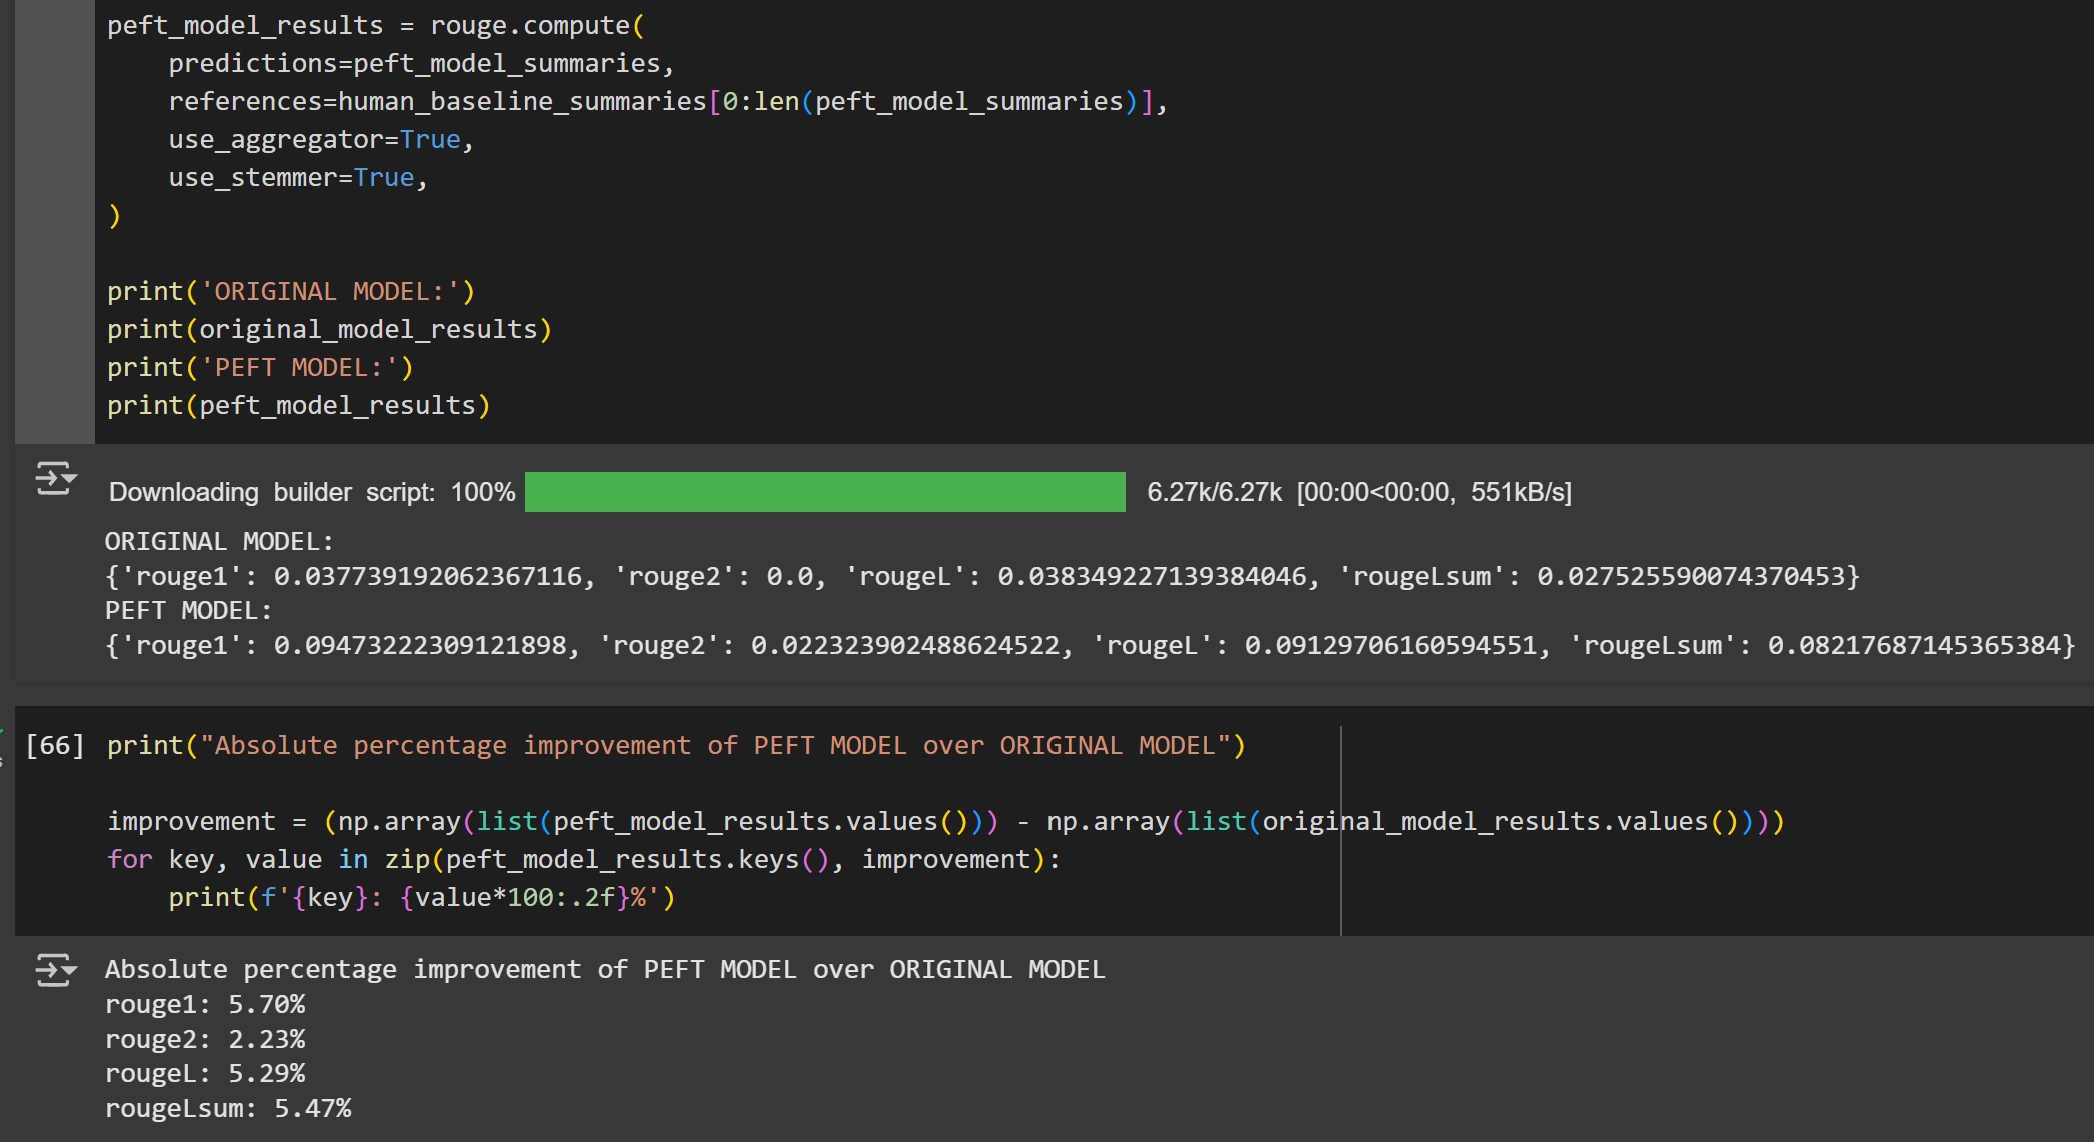

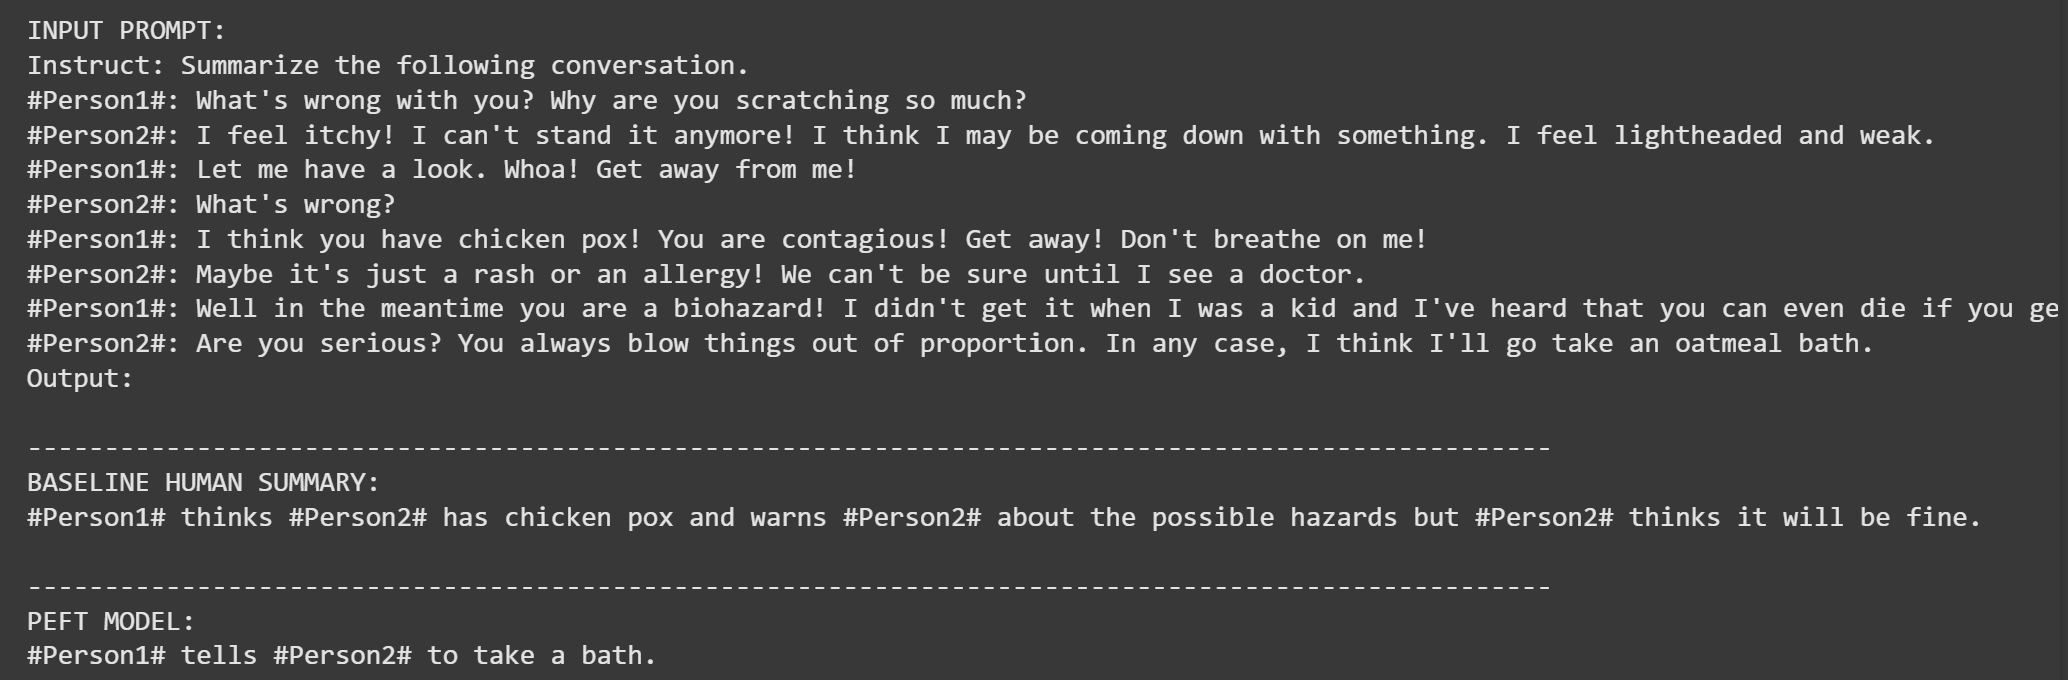

## Model details

1. Pre-trained mode name: DistilGPT-2

2. Description: A small language model for instruction-following and dialogue summarization tasks.

3. Parameters: Number of parameters in the model is 82 millions

4. Training data: "neil-code/dialogsum-test" from [Hugging Face](https://huggingface.co/datasets/neil-code/dialogsum-tes). This training data contains dialogs and their summaries, which is used to fine-tune the model for summarization tasks.